In [2]:
# Copyright (C) Yashasvi Baneswar Mishra - All Rights Reserved
# Unauthorized copying of this file, via any medium is strictly prohibited
# Proprietary and confidential
# Written by Yashasvi Baneswar Mishra <yashasvimishra1@gmail.com>, March 2022
 



import pandas as pd
from fbprophet import Prophet
import plotly.graph_objects as go
import pandas_datareader as web
from datetime import datetime
from datetime import timedelta

In [3]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

              ds             y
0     2014-09-17    457.334015
1     2014-09-18    424.440002
2     2014-09-19    394.795990
3     2014-09-20    408.903992
4     2014-09-21    398.821014
...          ...           ...
2718  2022-02-25  39214.218750
2719  2022-02-26  39105.148438
2720  2022-02-27  37709.785156
2721  2022-02-28  43193.234375
2722  2022-03-01  43561.398438

[2723 rows x 2 columns]


In [4]:
prophet = Prophet(seasonality_mode="multiplicative")
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = prophet.make_future_dataframe(periods=365)
print(future)

             ds
0    2014-09-17
1    2014-09-18
2    2014-09-19
3    2014-09-20
4    2014-09-21
...         ...
3083 2023-02-25
3084 2023-02-26
3085 2023-02-27
3086 2023-02-28
3087 2023-03-01

[3088 rows x 1 columns]


In [6]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
2888,2022-08-14,76530.079336,70962.846849,81996.075602
2889,2022-08-15,76850.353156,71425.332103,82537.986874
2890,2022-08-16,76881.036323,71365.408399,82409.129322
2891,2022-08-17,77974.845848,72553.080748,83509.504421
2892,2022-08-18,77740.542828,72294.105703,83692.408367
...,...,...,...,...
3083,2023-02-25,86555.923375,79690.217336,93456.236653
3084,2023-02-26,88870.537645,82153.231694,95907.407569
3085,2023-02-27,91471.127889,84461.209328,98886.814800
3086,2023-02-28,94021.939588,87098.204257,102068.172016


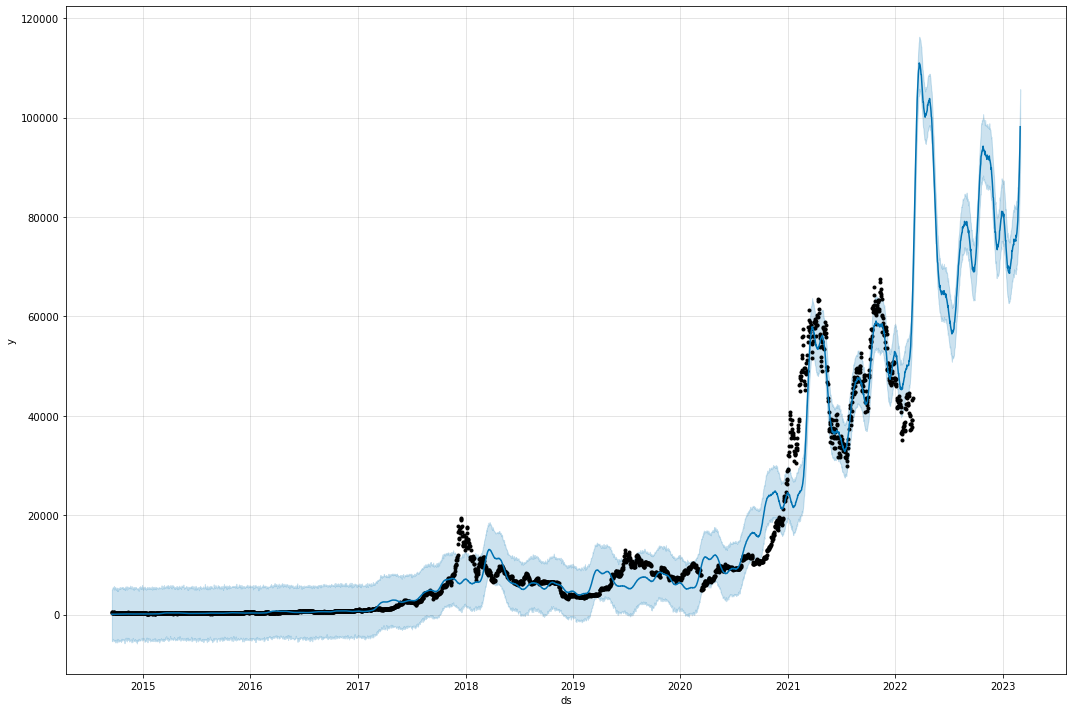

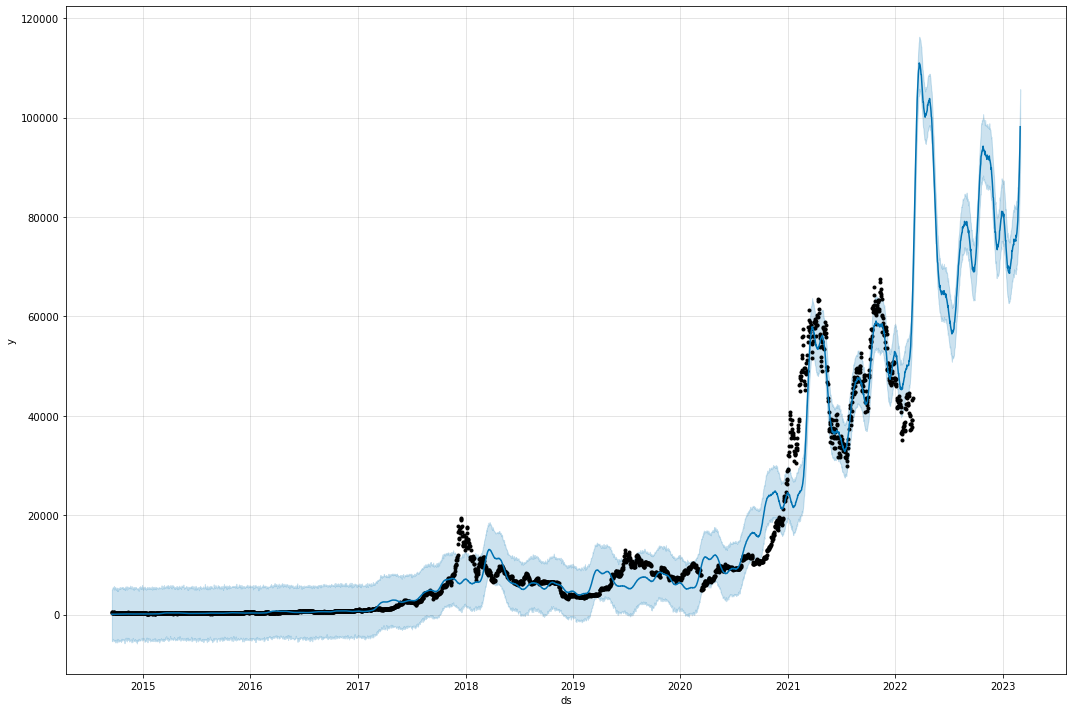

In [7]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(15, 10))


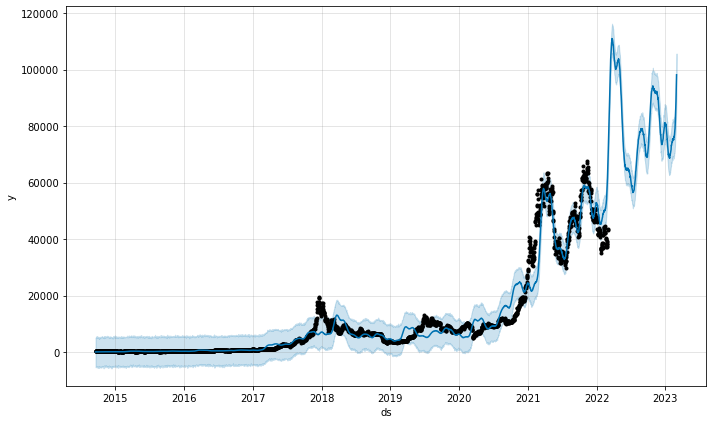

In [8]:
prophet.plot(forecast).savefig('1.png')

In [10]:
today = datetime.today().strftime('%Y-%m-%d')
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')
forecast[forecast['ds'] == next_day]['yhat'].item()

87167.18002301332